In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
df = pd.read_csv("solar_system.csv", index_col=0)
print(df.shape)
print(df.index)
print(df.columns)
df.head()


(20, 10)
Index(['Mass (10^24kg)', 'Diameter (km)', 'Density (kg/m^3)',
       'Gravity (m/s^2)', 'Escape Velocity (km/s)', 'Rotation Period (hours)',
       'Length of Day (hours)', 'Distance from Sun (10^6 km)',
       'Perihelion (10^6 km)', 'Aphelion (10^6 km)', 'Orbital Period (days)',
       'Orbital Velocity (km/s)', 'Orbital Inclination (deg)',
       'Orbital Eccentricity', 'Obliquity to Orbit (deg)',
       'Mean Temperature (C)', 'Surface Pressure (bars)', 'Number of Moons',
       'Ring System?', 'Global Magnetic Field?'],
      dtype='object', name='Attribute')
Index(['Mercury', 'Venus', 'Earth', 'Moon', 'Mars', 'Jupiter', 'Saturn',
       'Uranus', 'Neptune', 'Pluto'],
      dtype='object')


,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
Attribute,,,,,,,,,,
Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3


In [6]:
df.tail()

,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
Attribute,,,,,,,,,,
Mean Temperature (C),167,464,15,-20,-65,-110,-140,-195,-200,-225
Surface Pressure (bars),0,92,1,0,0.01,Unknown,Unknown,Unknown,Unknown,0.00001
Number of Moons,0,0,1,0,2,95,274,28,16,5
Ring System?,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Global Magnetic Field?,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Unknown


In [9]:
orbital_period = df[df.index.str.contains("Orbital")].iloc[0].astype(float)
perihelion = df[df.index.str.contains("Perihelion")].iloc[0].astype(float)
aphelion = df[df.index.str.contains("Aphelion")].iloc[0].astype(float)

orbital_period, perihelion, aphelion



(Mercury       88.0
 Venus        224.7
 Earth        365.2
 Moon          27.3
 Mars         687.0
 Jupiter     4331.0
 Saturn     10747.0
 Uranus     30589.0
 Neptune    59800.0
 Pluto      90560.0
 Name: Orbital Period (days), dtype: float64,
 Mercury      46.000
 Venus       107.500
 Earth       147.100
 Moon          0.363
 Mars        206.700
 Jupiter     740.600
 Saturn     1357.600
 Uranus     2732.700
 Neptune    4471.100
 Pluto      4436.800
 Name: Perihelion (10^6 km), dtype: float64,
 Mercury      69.800
 Venus       108.900
 Earth       152.100
 Moon          0.406
 Mars        249.300
 Jupiter     816.400
 Saturn     1506.500
 Uranus     3001.400
 Neptune    4558.900
 Pluto      7375.900
 Name: Aphelion (10^6 km), dtype: float64)

In [10]:
#Perihelion: the point in a planet’s orbit where it is closest to the Sun.

#Aphelion: the point in a planet’s orbit where it is farthest from the Sun.

#Semi-major axis: half of the longest diameter of the orbit

In [11]:
semi_major_axis = (perihelion + aphelion) / 2

semi_major_series = pd.Series(semi_major_axis, name="Semi-major axis (AU)")
df = pd.concat([df, semi_major_series.to_frame().T])

print("New shape:", df.shape)
df.tail()


New shape: (21, 10)


,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
Surface Pressure (bars),0,92,1,0,0.01,Unknown,Unknown,Unknown,Unknown,0.00001
Number of Moons,0,0,1,0,2,95,274,28,16,5
Ring System?,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Global Magnetic Field?,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Unknown
Semi-major axis (AU),57.9,108.2,149.6,0.3845,228.0,778.5,1432.05,2867.05,4515.0,5906.35


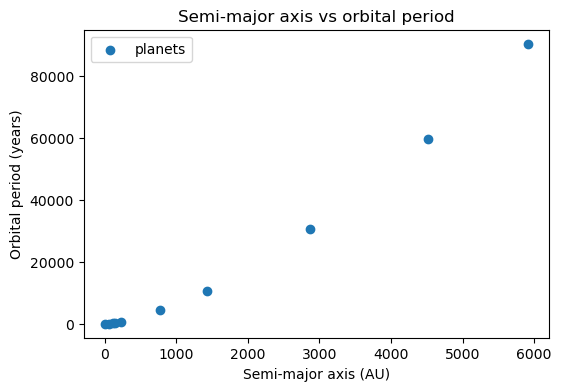

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(semi_major_axis, orbital_period, label="planets")
plt.xlabel("Semi-major axis (AU)")
plt.ylabel("Orbital period (years)")
plt.title("Semi-major axis vs orbital period")
plt.legend()
plt.show()

In [13]:
def keplers_third_law(a, m):
    return m * a ** 1.5


In [14]:
a_vals = semi_major_axis.values
T_vals = orbital_period.values

p0 = [1.0]
popt, pcov = curve_fit(keplers_third_law, a_vals, T_vals, p0=p0)
m_fit = popt[0]
print(f"T = {m_fit:.2f} * a^(3/2)")


T = 0.20 * a^(3/2)


In [15]:
residuals = T_vals - keplers_third_law(a_vals, m_fit)
chi2 = np.sum(residuals**2)
dof = len(a_vals) - len(popt)
chi2_reduced = chi2 / dof

print("Reduced chi-squared:", chi2_reduced)

Reduced chi-squared: 41276.70608939304


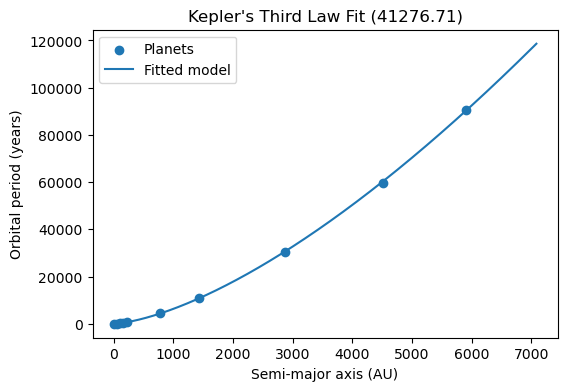

In [17]:
a_fit = np.linspace(a_vals.min() * 0.8, a_vals.max() * 1.2, 500)

plt.figure(figsize=(6,4))
plt.scatter(a_vals, T_vals, label="Planets")
plt.plot(a_fit, keplers_third_law(a_fit, m_fit), label="Fitted model")
plt.xlabel("Semi-major axis (AU)")
plt.ylabel("Orbital period (years)")
plt.title(f"Kepler's Third Law Fit ({chi2_reduced:.2f})")
plt.legend()
plt.show()


In [18]:
df.to_csv("kepler.csv")